Exercise 14.7. Logistic growth model.


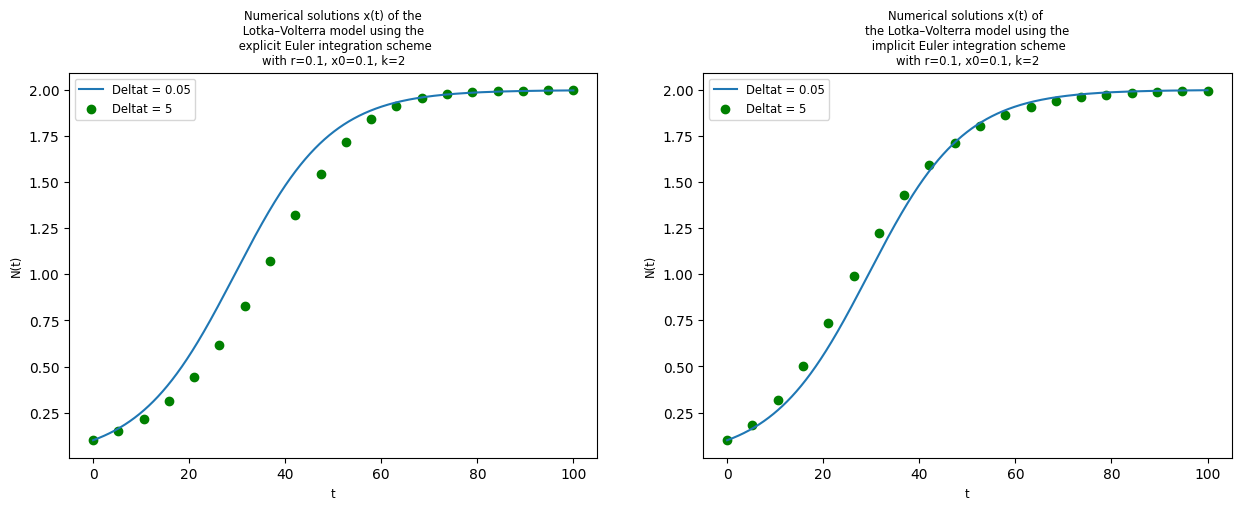

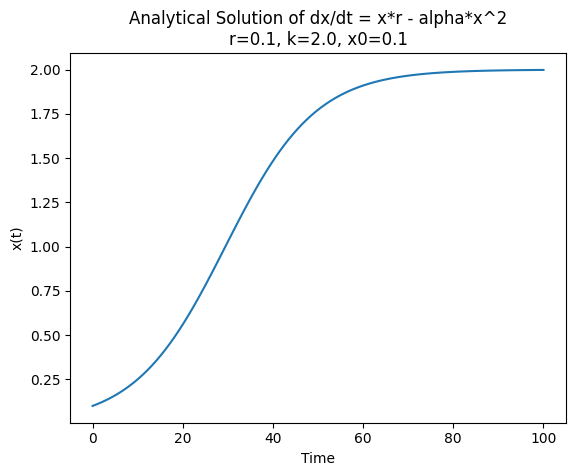

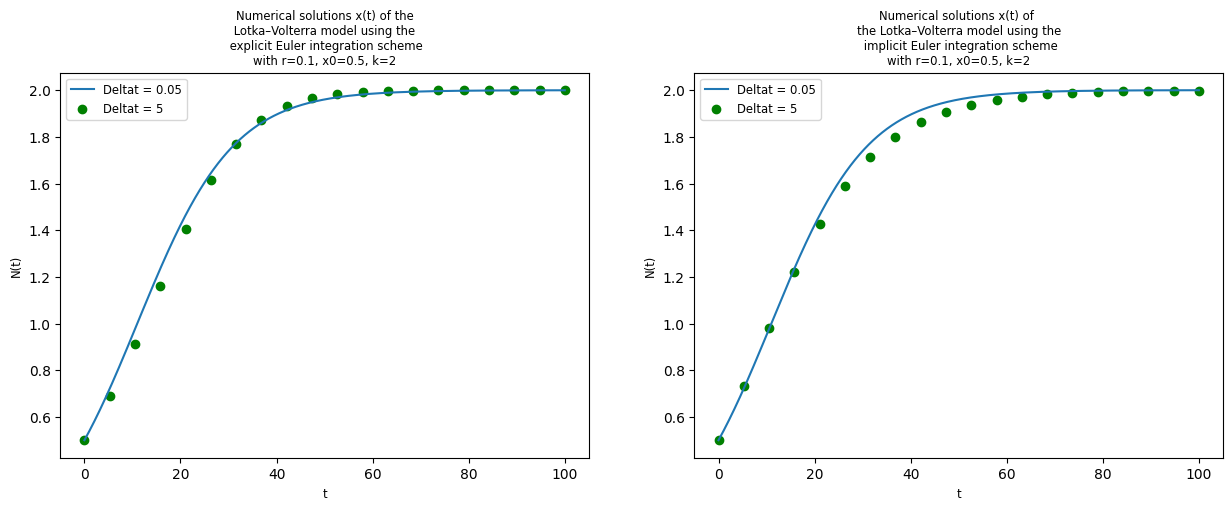

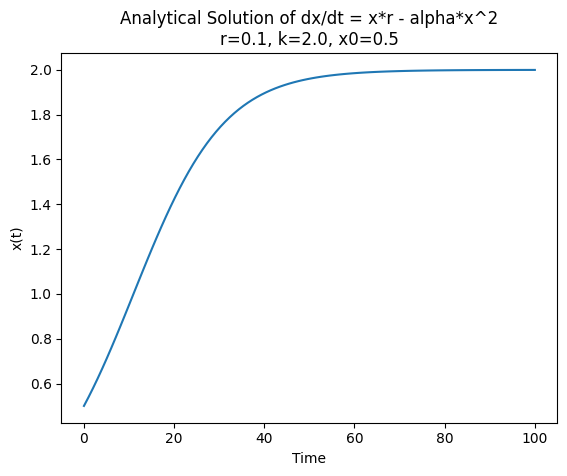

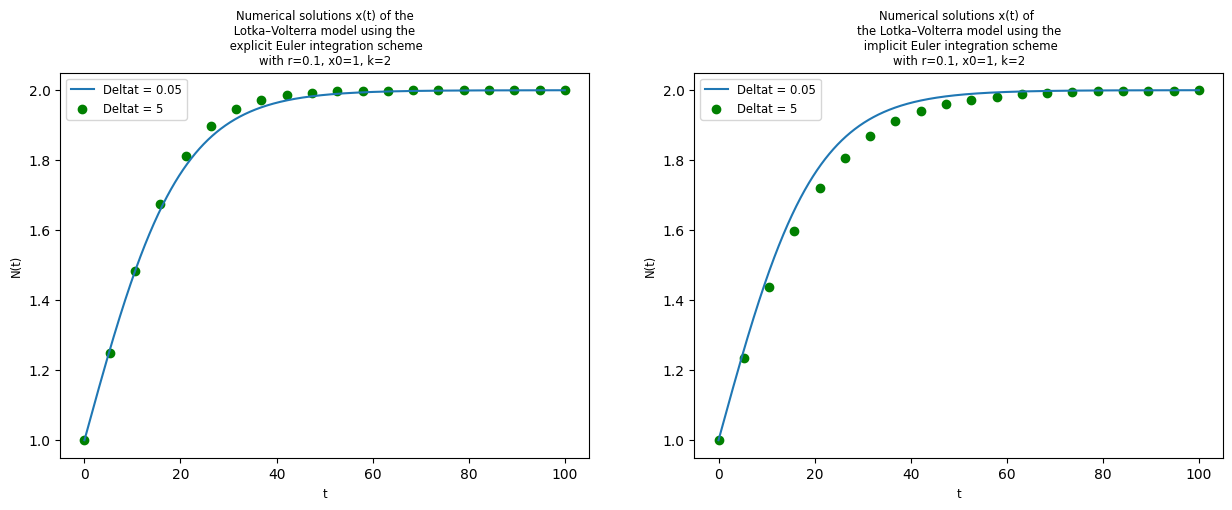

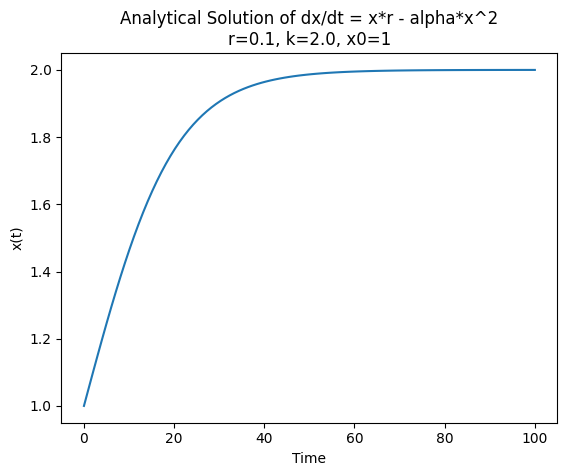

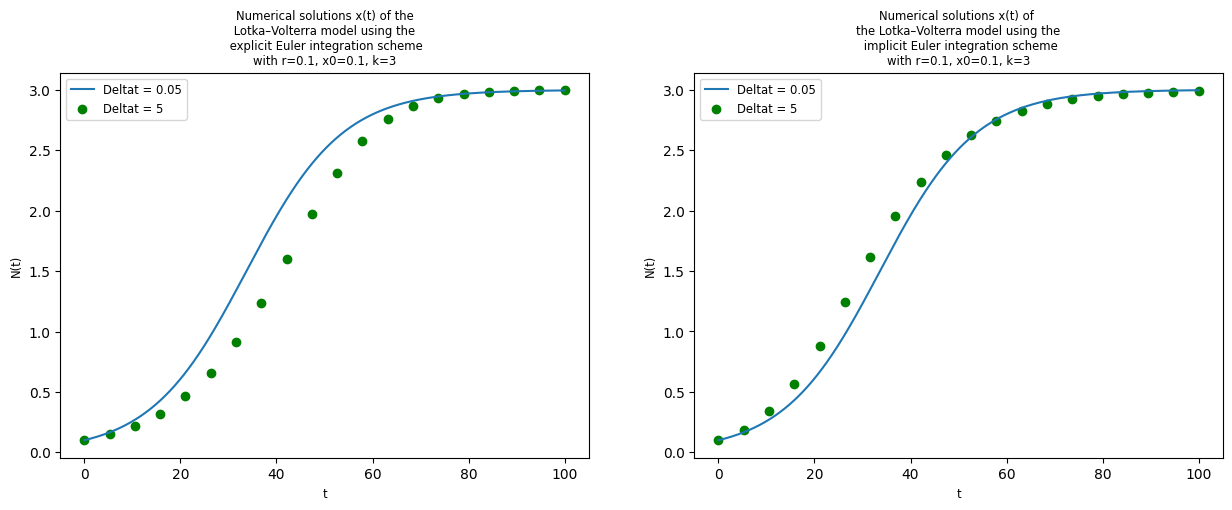

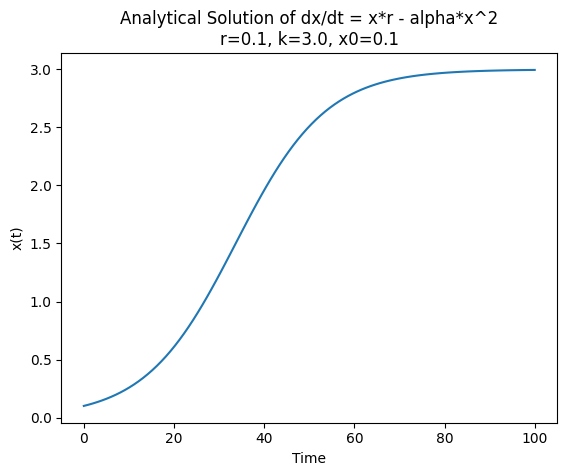

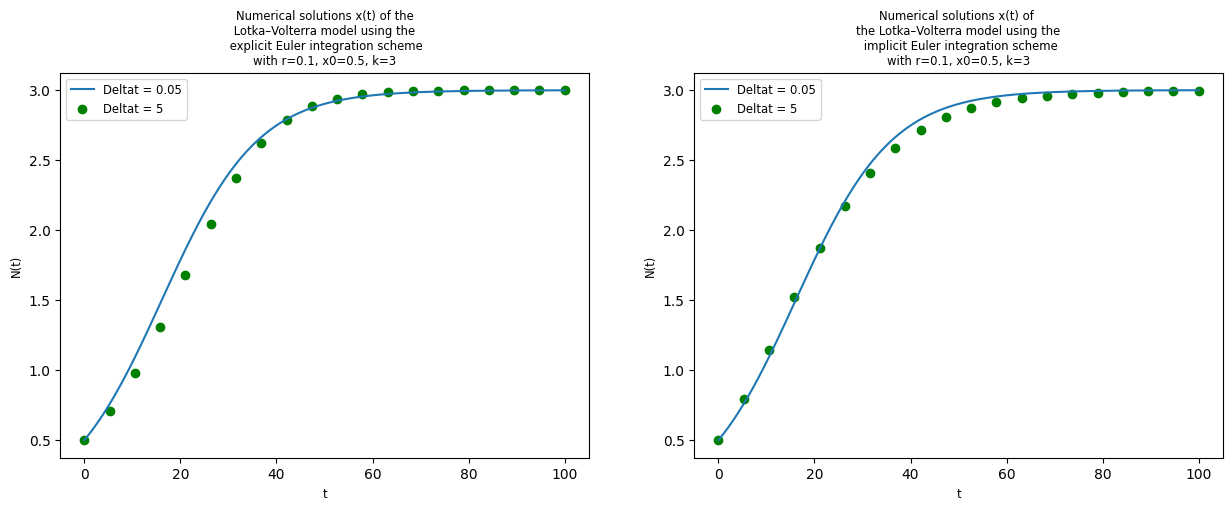

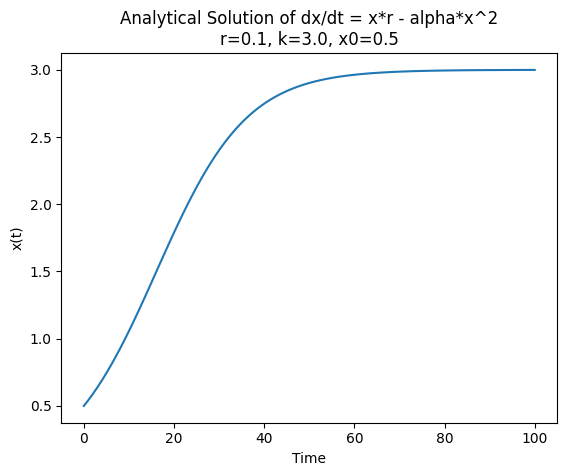

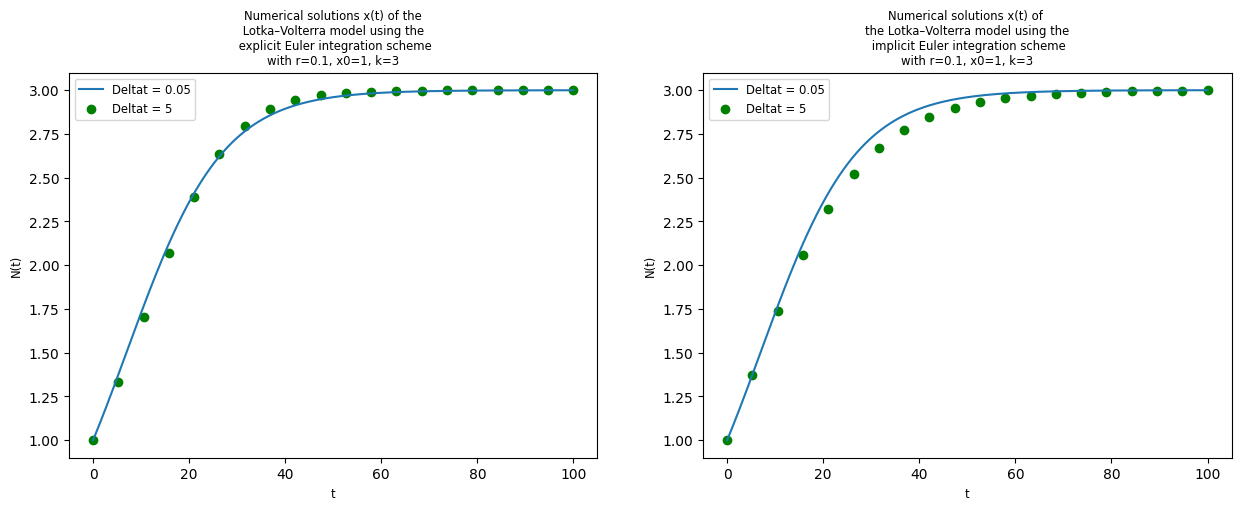

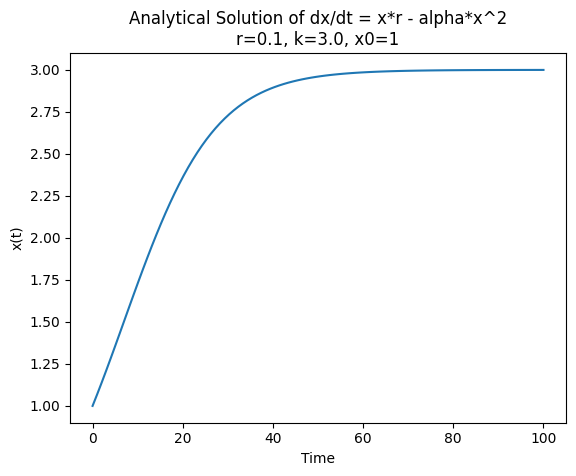

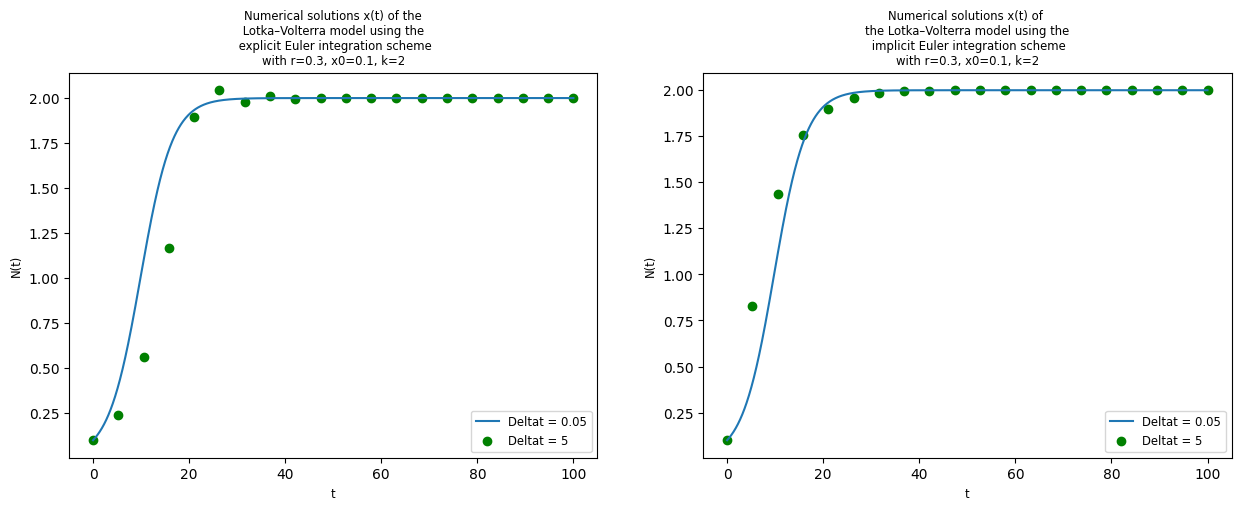

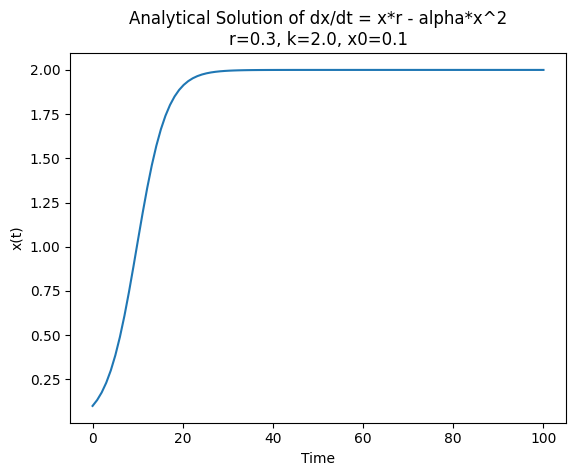

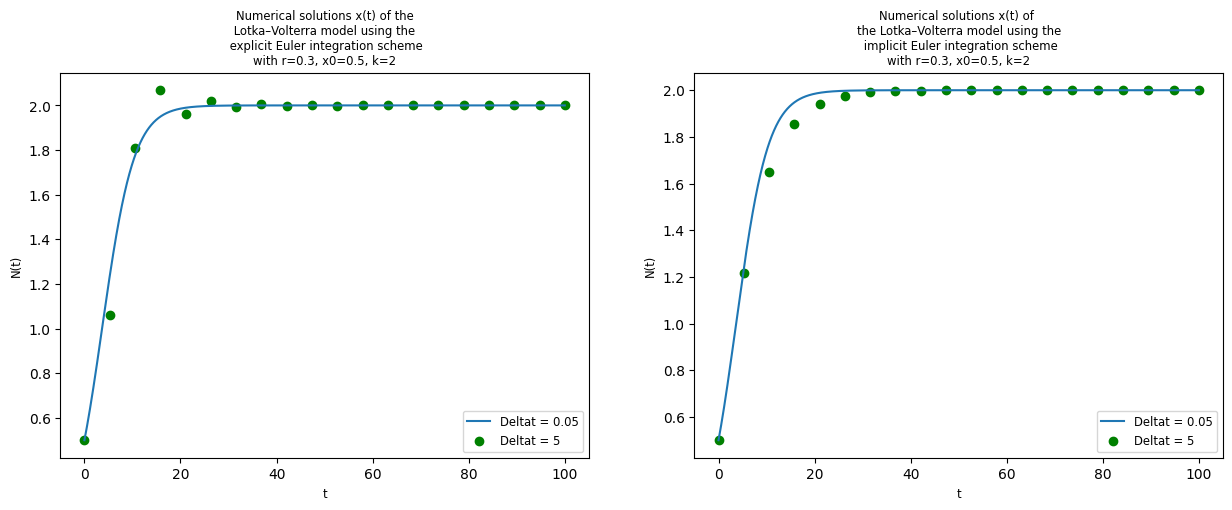

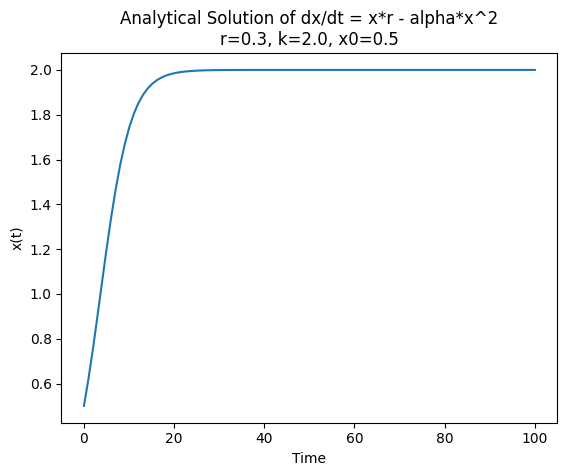

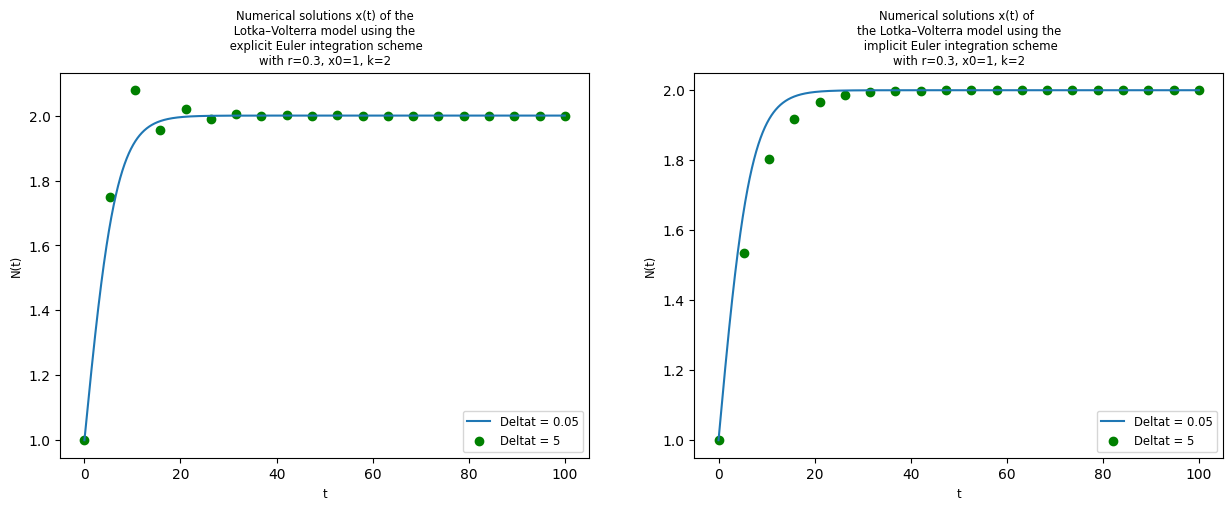

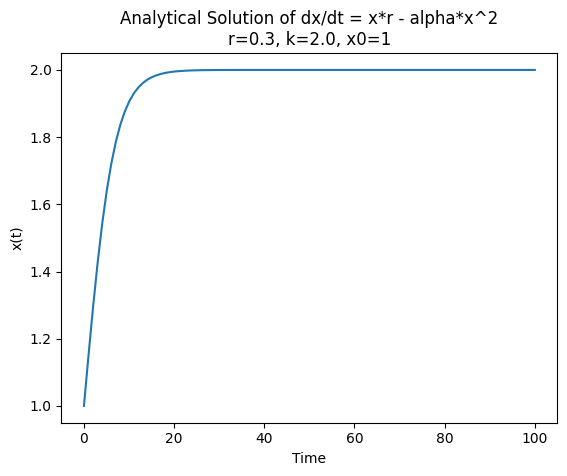

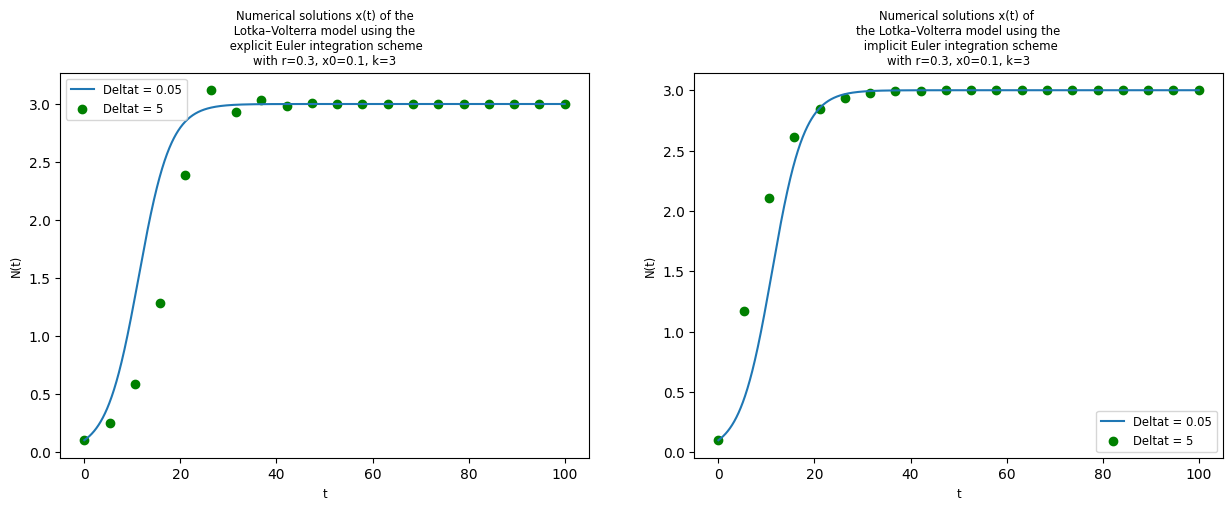

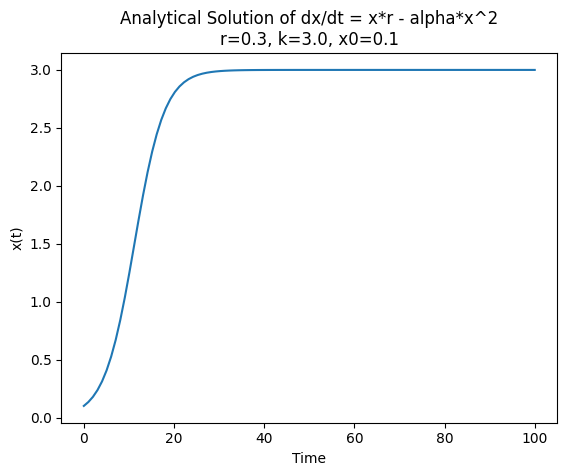

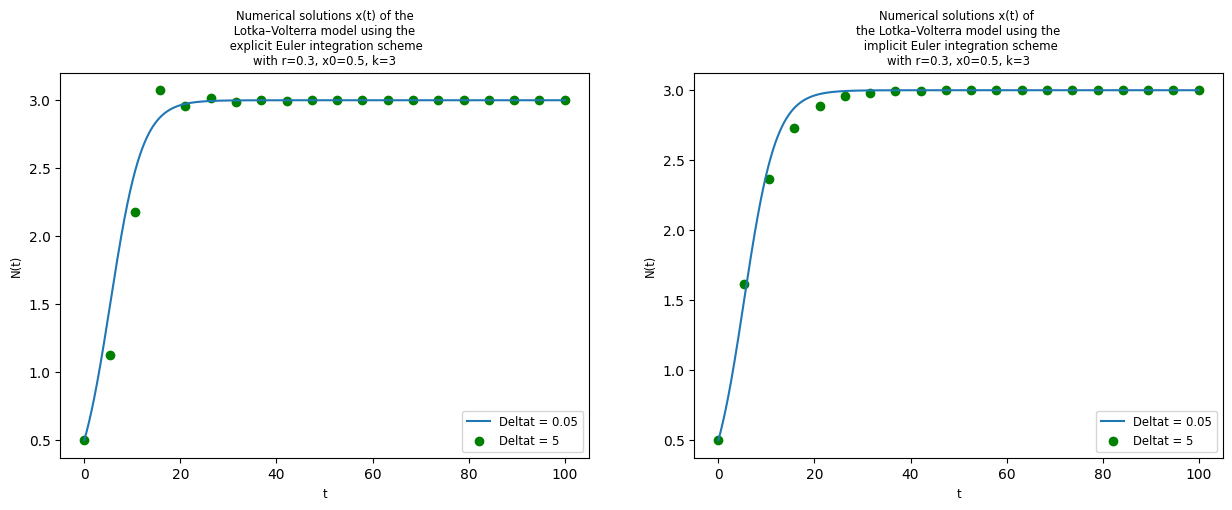

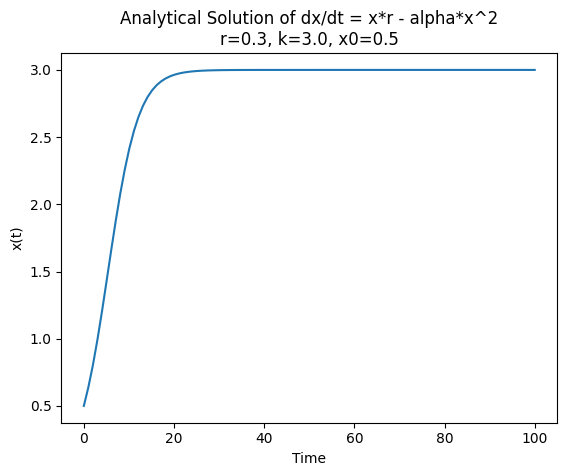

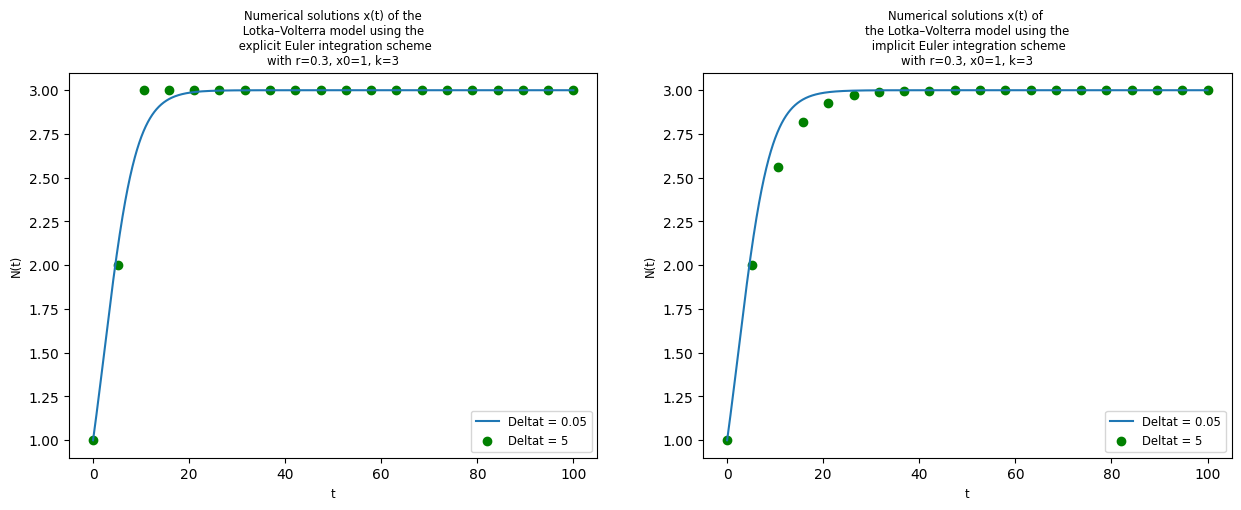

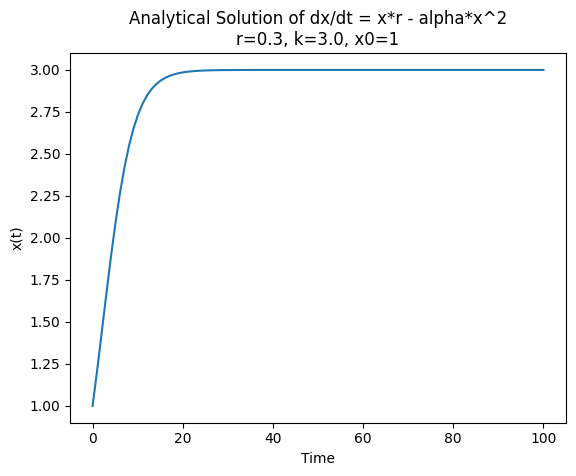

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

r_list=[0.1,0.3]
k_list =[2,3]
x0_list=[0.1,0.5,1]
dt_list= [0.05,5]
time = 100

def analytical_formula(t_list,K,x_0):
    sol=[]
    for t in t_list:
        denominoator = 1 + (((K / x_0) - 1) * np.exp(-r * (t - t_list[0])))
        sol.append(K/denominoator)
    return sol


def model(x, t, r, alpha):
    dxdt = x * r - alpha * x**2
    return dxdt

for r in r_list:
    for k in k_list:
        for x0 in x0_list:
            plt.figure(figsize=(15, 5))
            for dt in dt_list:
                total_t = int(time/dt)
                x_euler= np.zeros((total_t,1))
                x_euler[0]=x0

                x2 = np.zeros((total_t,1))
                x2[0]=x0

                t_list= np.linspace(0,time, total_t)

                for i in range(1,total_t):
                    x_euler[i]=x_euler[i-1] + (r*x_euler[i-1]*(1-(x_euler[i-1]/k)))*dt
                    # invarient[i]= calcualte_invariant(x[i],y[i])

                    x2[i] = k*(-(1-r*dt)+ np.sqrt((1-r*dt)**2+ 4*r*dt*x2[i-1]/k))/(2*r*dt)
                    

                x_initials = np.linspace(1, 2, 3)  
                y_initials = np.linspace(1, 2, 3)
                
                plt.subplot(1,2,1)
                if dt ==0.05:
                    plt.plot(t_list,x_euler, label='Deltat = 0.05')
                else:
                    plt.scatter(t_list,x_euler, label='Deltat = 5', color='green')
                plt.legend(fontsize ='small')
                plt.xlabel('t',fontsize ='small')
                plt.ylabel('N(t)',fontsize ='small')
                plt.title('Numerical solutions x(t) of the\n Lotka–Volterra model using the \n explicit Euler integration scheme\n'
                    'with r={}, x0={}, k={}'.format(r, x0, k), fontsize='small')

                plt.xticks(fontsize='10')
                plt.yticks(fontsize='10')
                plt.subplot(1,2,2)
                if dt ==0.05:
                    plt.plot(t_list,x2, label='Deltat = 0.05')
                else:
                    plt.scatter(t_list,x2, label='Deltat = 5', color='green')
                plt.legend(fontsize ='small')
                plt.xlabel('t',fontsize ='small')
                plt.ylabel('N(t)',fontsize ='small')
                plt.title('Numerical solutions x(t) of \nthe Lotka–Volterra model using the\n implicit Euler integration scheme\n'
                    'with r={}, x0={}, k={}'.format(r, x0, k), fontsize='small')

                plt.xticks(fontsize='10')
                plt.yticks(fontsize='10')
                 
            plt.show()
            t = np.linspace(0, 100, 100) 
            alpha = r/k
            solution = analytical_formula(t,k,x0)
            # solution = odeint(model, x0, t, args=(r, alpha))
            plt.plot(t, solution)
            plt.xlabel('Time')
            plt.ylabel('x(t)')
            plt.title(f'Analytical Solution of dx/dt = x*r - alpha*x^2\nr={r}, k={r/alpha}, x0={x0}')
            plt.show()
